In [ ]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train_df = pd.read_csv('sample_data/california_housing_train.csv')
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test_df = pd.read_csv('sample_data/california_housing_test.csv')
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


<Axes: >

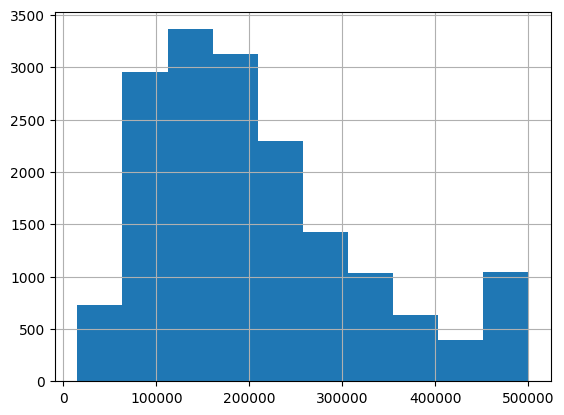

In [ ]:
train_df['median_house_value'].hist()

In [ ]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
try_X = train_df.drop('median_house_value', axis=1)
try_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
try_X = torch.Tensor(try_X.values)


In [ ]:
try_X.shape

torch.Size([17000, 8])

In [ ]:
model_0(try_X).shape

torch.Size([17000, 1])

In [ ]:
X_train, y_train = torch.Tensor(train_df.drop(['median_house_value'], axis=1).values), torch.Tensor(train_df['median_house_value']).unsqueeze(1).type(torch.float)
X_test, y_test = torch.Tensor(test_df.drop(['median_house_value'], axis=1).values), torch.Tensor(test_df['median_house_value']).unsqueeze(1).type(torch.float)
X_train.shape, y_test.shape

(torch.Size([17000, 8]), torch.Size([3000, 1]))

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

In [ ]:
class Model_california(nn.Module):
  def __init__(self):
    super().__init__()
    self.stack = nn.Sequential(
      nn.Linear(in_features=8, out_features=32),
      nn.ReLU(),
      nn.Linear(in_features=32, out_features=16),
      nn.Linear(in_features=16, out_features=1)
    )
  def forward(self, x):
    return self.stack(x)
model_0 = Model_california()
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.1)

In [ ]:
EPOCHS = 1000
for epoch in range(EPOCHS):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 100 == 0:
    print(f'----------{epoch + 1}----------')
    print(f'Train Loss:{loss}')
  model_0.eval()
  with torch.inference_mode():
    y_pred_test = model_0(X_test)
    loss_test = loss_fn(y_pred_test, y_test)
    if (epoch + 1) % 100 == 0:
      print(f'Test Loss:{loss_test}')

----------100----------
Train Loss:75518.484375
Test Loss:73648.65625
----------200----------
Train Loss:65573.1015625
Test Loss:65942.2109375
----------300----------
Train Loss:63215.0078125
Test Loss:60584.1640625
----------400----------
Train Loss:56851.33984375
Test Loss:60329.21484375
----------500----------
Train Loss:57680.5703125
Test Loss:55594.4140625
----------600----------
Train Loss:53733.9765625
Test Loss:55025.625
----------700----------
Train Loss:56512.46875
Test Loss:53273.08984375
----------800----------
Train Loss:51000.49609375
Test Loss:51103.86328125
----------900----------
Train Loss:51953.57421875
Test Loss:51155.76171875
----------1000----------
Train Loss:57132.4765625
Test Loss:56634.1328125
